# Tutorial: Incorporating Mask into Cutout Workflow


![image.png](../_static/images/mask_cutout_workflow.png)

## Introduction

Geodata is able to process geospatial data to extract cutouts over specified geographies. Built off the [rasterio library](https://rasterio.readthedocs.io/en/latest/quickstart.html), the **mask** module imports rasters and shapefiles, merges and flattens multiple layers together, and extracts subsetted cutout data from merged masks and shapefiles.

After we create a mask, we can incorporate the suitability mask object/file into the Cutout. The cutouts are subsets of data based on specific time and geographic ranges. For more information on the creation of cutout, refer to these tutorials: [Creating Cutouts with MERRA2 Data](https://github.com/east-winds/geodata/blob/master/doc/merra2/merra2_createcutout.md), [Downloading and Creating Cutouts with ERA5 Data](https://github.com/east-winds/geodata/blob/master/doc/era5/era5_download.md)

## Setup

To start, import the geodata package and required libraries.

In [1]:
import matplotlib.pyplot as plt

import geodata

### Download Data

We will use a Cutout object created from a downloaded dataset. **If you have already created a cutout, load it here and skip to step 3.**


We first download the dataset through `geodata.Dataset()`. In `get_data()`, if we specify `testing=True`, the program downloads only first file in download list (e.g., first day of month)

In [2]:
dataset_test = geodata.Dataset(
    module="merra2",
    years=slice(2011, 2011),
    months=slice(1, 1),
    weather_data_config="slv_radiation_hourly",
)

2024-11-21 16:47:15,385 - geodata._dataset - INFO - Bounds was not specified, default to global bounds.
2024-11-21 16:47:15,387 - geodata._dataset - INFO - Directory /Users/geodata/.local/geodata/merra2 found, checking for completeness.
2024-11-21 16:47:15,387 - geodata._dataset - INFO - File `/Users/geodata/.local/geodata/merra2/2011/01/MERRA2_400.tavg1_2d_slv_rad_Nx.20110102.nc4` not found!
2024-11-21 16:47:15,388 - geodata._dataset - INFO - File `/Users/geodata/.local/geodata/merra2/2011/01/MERRA2_400.tavg1_2d_slv_rad_Nx.20110103.nc4` not found!
2024-11-21 16:47:15,388 - geodata._dataset - INFO - File `/Users/geodata/.local/geodata/merra2/2011/01/MERRA2_400.tavg1_2d_slv_rad_Nx.20110104.nc4` not found!
2024-11-21 16:47:15,388 - geodata._dataset - INFO - File `/Users/geodata/.local/geodata/merra2/2011/01/MERRA2_400.tavg1_2d_slv_rad_Nx.20110105.nc4` not found!
2024-11-21 16:47:15,388 - geodata._dataset - INFO - File `/Users/geodata/.local/geodata/merra2/2011/01/MERRA2_400.tavg1_2d_slv_

In [3]:
if not dataset_test.prepared:
    dataset_test.get_data(testing=True)

2024-11-21 16:47:15,402 - geodata._dataset - INFO - First file for testing has already been downloaded.


Extract the cutout from the trimmed dataset.

In [4]:
cutout = geodata.Cutout(
    name="china-2011-slv-hourly-test",
    module="merra2",
    weather_data_config="slv_radiation_hourly",
    xs=slice(73, 136),
    ys=slice(18, 54),
    years=slice(2011, 2011),
    months=slice(1, 1),
)
cutout.prepare()

2024-11-21 16:47:15,434 - geodata._cutout - INFO - All cutout (china-2011-slv-hourly-test, /Users/geodata/.local/geodata/cutouts) files available.
2024-11-21 16:47:15,437 - geodata._cutout - INFO - Cutout subset prepared: <Cutout china-2011-slv-hourly-test x=73.12-135.62 y=18.00-54.00 time=2011/1-2011/1 prepared>
2024-11-21 16:47:15,438 - geodata._preparation - INFO - The cutout is already prepared. If you want to recalculate it, supply an `overwrite=True` argument.


True

## Load Mask

In this tutorial, we use the `china` mask, created in this documentation: [mask_creation_workflow](mask_creation_workflow.ipynb)

In [5]:
# View the contents of the china mask
geodata.mask.load_mask("china")

2024-11-21 16:47:16,074 - geodata.mask - INFO - Layer ['modis_filtered', 'protected', 'slope_filtered', 'elevation_filtered'] loaded to the mask china.
2024-11-21 16:47:16,075 - geodata.mask - INFO - Merged_mask loaded to the mask china.


2024-11-21 16:47:16,078 - geodata.mask - INFO - Shape mask ['Zhejiang', 'Shanghai', 'Jiangsu'] loaded to the mask china.


Mask china: 
4 layers: ['modis_filtered', 'protected', 'slope_filtered', 'elevation_filtered'].
Merged_mask merged/flattened. 
3 shape_mask: ['Zhejiang', 'Shanghai', 'Jiangsu']. 
Mask has been saved. 

## Adding Mask Variables to a Cutout

### Adding Masking Variables

The `add_mask` method will add attribute `merged_mask` and `shape_mask` from the Mask object to the Cutout object. Once the mask is added to the Cutout object, the `merged_mask` or `shape_mask` from the Mask object will be stored in the format of xarray.DataArray in the Cutout object, and their dimensions will be coarsened to the same dimension with the Cutout metadata.

The `add_mask` method will look for both `merged_mask` and `shape_mask` attribute saved for the loaded mask, unless the user set the parameter `merged_mask=False`, or `shape_mask=False`.


In [6]:
cutout.add_mask("china")

2024-11-21 16:47:17,368 - geodata.mask - INFO - Layer ['modis_filtered', 'protected', 'slope_filtered', 'elevation_filtered'] loaded to the mask china.
2024-11-21 16:47:17,370 - geodata.mask - INFO - Merged_mask loaded to the mask china.
2024-11-21 16:47:17,372 - geodata.mask - INFO - Shape mask ['Zhejiang', 'Shanghai', 'Jiangsu'] loaded to the mask china.
2024-11-21 16:47:17,373 - geodata.mask - INFO - Please remember to close the merged_mask xarray for further changes of the mask object.
2024-11-21 16:47:17,856 - geodata._cutout - INFO - Cutout.merged_mask added.
2024-11-21 16:47:17,867 - geodata.mask - INFO - Please close the shape_mask xarray(s) for further changes of the mask object.
2024-11-21 16:47:19,295 - geodata._cutout - INFO - Cutout.shape_mask added.


Plot the merged mask, coarsened to cutout resolution

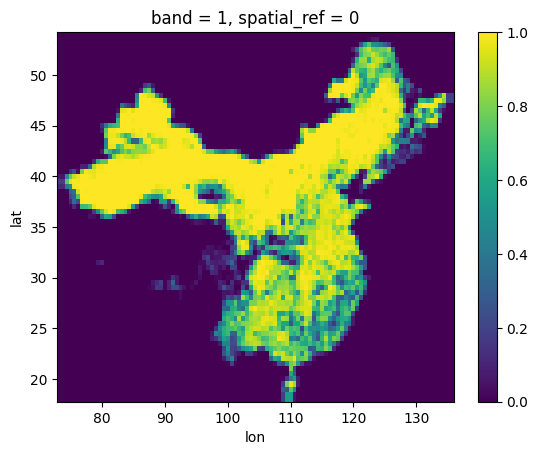

In [7]:
cutout.merged_mask.plot()

### Adding Area Variable


To calculate and add the variation of grid cell areas by latitude to the cutout, use the `add_grid_area` method. Keeping track of the area for each grid cell is necessary for analyses such as calculating the weighted sum of the grid cells based on their area.

In [8]:
cutout.add_grid_area()

### Creating PV Data Through Cutout Conversion

The code block below will use the `geodata.convert.pv` method to generate `ds_cutout`, an xarray Dataset that contains the pv variable for the cutout.

We transform the xarray DataArray into a xarray DataSet (which can contain multiple DataArray). 

In [9]:
ds_cutout = cutout.pv(panel="KANEKA", orientation="latitude_optimal").to_dataset(
    name="solar"
)
len(ds_cutout.time)

24

We also need to remove the time dimension by calculating daily means via `ds_cutout.coarsen(time=24, boundary="exact").mean()`, which aggregates the values over its 24 timestamps.

In [10]:
ds_cutout_mean = ds_cutout.coarsen(time=24, boundary="exact").mean()

### Combining PV Data with Mask

The `mask` method for the Cutout will mask converted xarray.Dataset variable, such as `ds_cutout` and `ds_cutout_mean` created above, by combining it with merged_mask or shape_mask in the Cutout object. It will return a dictionary of xarray Dataset. Each key in the dictionary is one unique mask from either the merged_mask or shape_mask variable from the Cutout object, and each value is an xarray dataset containing the dataSet variable (`ds_cutout` or `ds_cutout_mean`) with the mask and area values.

The program will automatically search for `merged_mask` and `shape_mask` to combine with the xarray.Dataset, unless the user specify `merged_mask=False` or `shape_mask=False`. The masks in `shape_mask` will have the same key as it has in the `shape_mask` attribute, and the mask for `merged_mask` will have the same key name `merged_mask`, as `merged_mask` is unique to each mask.

#### Daily averaged PV values

In [11]:
ds_mask_mean = cutout.mask(dataset=ds_cutout_mean)
ds_mask_mean.keys()

2024-11-21 16:47:40,060 - geodata._cutout - INFO - merged_mask combined with dataset. 
2024-11-21 16:47:40,064 - geodata._cutout - INFO - shape_mask combined with dataset. 


dict_keys(['merged_mask', 'Zhejiang', 'Shanghai', 'Jiangsu'])

From the output variable `ds_mask_mean`, check out the combined xarray.Dataset for the Jiangsu province, and plot each of its xarray.DataArray.

In [12]:
ds_mask_mean["Jiangsu"]

<xarray.Dataset> Size: 149kB
Dimensions:  (time: 1, lat: 73, lon: 101)
Coordinates:
  * lat      (lat) float64 584B 18.0 18.5 19.0 19.5 20.0 ... 52.5 53.0 53.5 54.0
  * time     (time) datetime64[ns] 8B 2011-01-01T12:00:00
  * lon      (lon) float64 808B 73.12 73.75 74.38 75.0 ... 134.4 135.0 135.6
Data variables:
    solar    (time, lat, lon) float64 59kB 0.1928 0.1917 ... 0.06296 0.04254
    mask     (lat, lon) float32 29kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    area     (lat, lon) float64 59kB 3.663e+03 3.663e+03 ... 2.281e+03 2.281e+03

Visualize the averaged PV value for each grid cell in the Cutout. Note that the data is the aggregated value for the date.

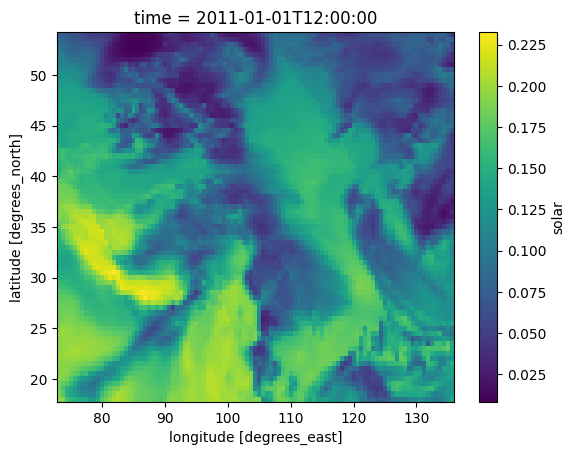

In [13]:
ds_mask_mean["Jiangsu"]["solar"].plot()

Visualize the masking value for each grid cell in the Cutout.

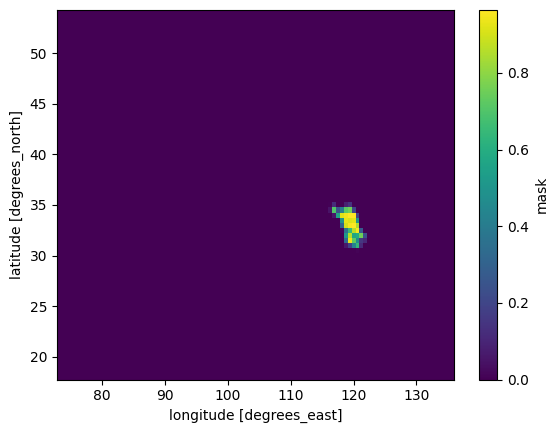

In [14]:
ds_mask_mean["Jiangsu"]["mask"].plot()

#### Area and Mask-Weighted Hourly PV Values

We use the raw hourly output generated by cutout to create time-series PV plots weighted by the mask and area. Note that we transposed ds_cutout so that time is set as the first dimension, which ease the following calculation since we want to aggregate the array spatially from each grid cell.

In [15]:
ds_mask = cutout.mask(ds_cutout)
ds_mask.keys()

2024-11-21 16:47:44,364 - geodata._cutout - INFO - merged_mask combined with dataset. 
2024-11-21 16:47:44,367 - geodata._cutout - INFO - shape_mask combined with dataset. 


dict_keys(['merged_mask', 'Zhejiang', 'Shanghai', 'Jiangsu'])

Calculate the aggregated mean solar PV for each provinces, at each time point. We will apply this equation below to calculate the area-weighted average. We save the result into a dictionary `PV_dict`, where its keys are the provinces, and the corresponding values are the PV series.

$$\text{Aggregated Solar Power For Each Region} = \frac{\sum_{}^\text{For Each Grid Cell}\text{Grid Cell Area} \times \text{Mask Value} \times \text{Solar Power}}{\sum_{}^\text{For Each Grid Cell}\text{Grid Cell Area} \times \text{Mask Value}}$$

In [16]:
PV_dict = {}

for prov_name in list(ds_mask)[1:]:
    PV_dict[prov_name] = (
        (ds_mask[prov_name]["solar"] * ds_mask[prov_name]["mask"] * ds_mask[prov_name]["area"])
        .sum(axis=1)
        .sum(axis=1)
    ) / (ds_mask[prov_name]["mask"] * ds_mask[prov_name]["area"]).sum()

The aggregated PV time-series for Zhejiang province.

In [17]:
PV_dict["Zhejiang"]

<xarray.DataArray (time: 24)> Size: 192B
array([0.17417363, 0.36221223, 0.51891581, 0.62599815, 0.6783619 ,
       0.66484496, 0.56742536, 0.38346645, 0.13803202, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03283214])
Coordinates:
  * time     (time) datetime64[ns] 192B 2011-01-01T00:30:00 ... 2011-01-01T23...

Finally, for each province, plot the solar series weighted by mask * area.

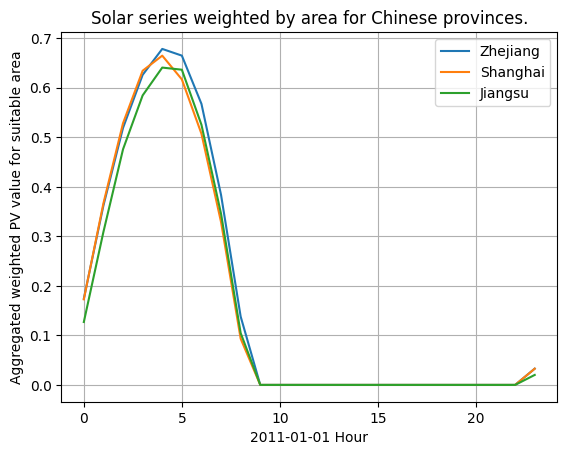

In [18]:
for prov_name, series in PV_dict.items():
    plt.plot(series, label=prov_name)

    plt.title(f"Solar series weighted by area for Chinese provinces.")
    plt.grid()
    plt.legend()
    plt.xlabel("2011-01-01 Hour")
    plt.ylabel("Aggregated weighted PV value for suitable area")